# Proyek Analisis Data: Bike Sharing
- **Nama:** Pande Komang Indah Triroshanti
- **Email:** triroshanti@gmail.com
- **ID Dicoding:** indahtr

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca (suhu, kelembaban, kecepatan angin) terhadap jumlah sepeda yang disewa?
- Apakah jumlah penyewaan sepeda berbeda pada hari kerja dan hari libur?
- Apakah terdapat pola musiman yang jelas dalam penyewaan sepeda (musim panas, dingin, musim gugur, dan musim semi)?


## Import Semua Packages/Library yang Digunakan

In [4]:
pip install streamlit

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat Tabel Day

In [6]:
day_df = pd.read_csv('/content/data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat Tabel Hour

In [7]:
hour_df = pd.read_csv('/content/data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Melihat informasi dataset

In [8]:
print("Informasi dataset day.csv:")
day_df.info()

print("\nInformasi dataset hour.csv:")
hour_df.info()

Informasi dataset day.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Informasi dataset hour.csv:
<class 'pandas.core.frame.DataFrame'>

Menghitung jumlah missing value dan duplikat pada dataset

In [9]:
print("Jumlah missing value pada day.csv:")
print(day_df.isnull().sum())

print("\nJumlah duplikasi data pada day.csv:")
print(day_df.duplicated().sum())

print("\nJumlah missing value pada hour.csv:")
print(hour_df.isnull().sum())

print("\nJumlah duplikasi data pada hour.csv:")
print(hour_df.duplicated().sum())

Jumlah missing value pada day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah duplikasi data pada day.csv:
0

Jumlah missing value pada hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah duplikasi data pada hour.csv:
0


Mencetak ringkasan parameter statistik untuk mengecek inaccurate value

In [10]:
print("\nDeskripsi statistik untuk day.csv:")
day_df.describe()


Deskripsi statistik untuk day.csv:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
print("\nDeskripsi statistik untuk hour.csv:")
hour_df.describe()


Deskripsi statistik untuk hour.csv:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terdapat 1 tipe data yang tidak sesuai yaitu tipe data untuk 'dteday' berupa object, dan sebaiknya dirubah ke datetime untuk memudahkan proses berikutnya
- Tidak Terdapat missing value, dan duplicate pada dataset
- Terdapat nilai 0 pada *hum* yang mengindikasikan innacurate value

Menghitung data dengan nilai *hum* 0

In [31]:
hum_zero_count = (day_df.hum == 0).sum()
hum_zero_data = day_df[day_df['hum'] == 0]

print(hum_zero_data[['hum', 'weathersit', 'season']])
print(f'\n Jumlah kelembapan 0: {hum_zero_count}')

    hum  weathersit  season
68  0.0           3       1

 Jumlah kelembapan 0: 1


**Insight:**
- data dengan nilai *hum* 0 atau kondisi kering, menunjukkan *weathersit* bernilai 3 yang menunjukkan kondisi hujan dan salju ringan yang seharusnya disertai dengan kelembapan yang relatif tinggi, kemudian *season* bernilai 1 yang menunjukkan musim semi atau *spring* dan biasanya ditandai dengan cuaca yang lembap karena sering terjadi hujan. Dengan begitu, *hum* yang bernilai 0 menunjukkan adanya kesalahan data.

### Cleaning Data

Merubah tipe data 'dteday' dari object menjadi datetime

In [12]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [13]:
print("Tipe data day.csv:")
print(day_df.dtypes)

print("\nTipe data hour.csv:")
print(hour_df.dtypes)

Tipe data day.csv:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

Tipe data hour.csv:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt               

Mengatasi kesalahan data pada

In [33]:
# Menghitung median kelembapan untuk season yang bernilai 1 atau spring
median_humidity_season_1 = day_df[day_df['season'] == 1]['hum'].median()

# Menggantikan semua nilai hum yang bernilai 0 dengan median hum pada season yang bernilai 1
day_df.loc[day_df['hum'] == 0, 'hum'] = median_humidity_season_1

# Menghitung jumlah hum yang masih bernilai 0
hum_zero_count = (day_df.hum == 0).sum()
print(f'Jumlah kelembapan 0: {hum_zero_count}')

Jumlah kelembapan 0: 0


## Exploratory Data Analysis (EDA)

In [34]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628638,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140553,0.077498,686.622488,1560.256377,1937.211452


In [35]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Mengelompokkan Data berdasarkan Cuaca (Weathersit)

In [16]:
weathersit_stats = day_df.groupby('weathersit').agg({
    'cnt': ['mean', 'max', 'min', 'std'],
    'temp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
})

print(weathersit_stats)

                    cnt                              temp       hum windspeed
                   mean   max  min          std      mean      mean      mean
weathersit                                                                   
1           4876.786177  8714  431  1879.483989  0.511541  0.565594  0.190253
2           4035.862348  8362  605  1809.109918  0.470366  0.725887  0.186431
3           1803.285714  4639   22  1240.284449  0.433440  0.848872  0.243336


Mengelompokkan Data berdasarkan Musim (season)

In [17]:
season_stats = day_df.groupby('season').agg({
    'cnt': ['mean', 'max', 'min', 'std'],
    'temp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
})

print(season_stats)

                cnt                               temp       hum windspeed
               mean   max   min          std      mean      mean      mean
season                                                                    
1       2604.132597  7836   431  1399.942119  0.297748  0.582903  0.214537
2       4992.331522  8362   795  1695.977235  0.544405  0.626948  0.203507
3       5644.303191  8714  1115  1459.800381  0.706309  0.633482  0.172095
4       4728.162921  8555    22  1699.615261  0.422906  0.668719  0.171995


Mengelompokkan Data berdasarkan Hari Kerja (Working Day)

In [18]:
workingday_stats = day_df.groupby('workingday').agg({
    'cnt': ['mean', 'max', 'min', 'std'],
    'temp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
})

print(workingday_stats)

                    cnt                              temp       hum windspeed
                   mean   max  min          std      mean      mean      mean
workingday                                                                   
0           4330.168831  8714  605  2052.141245  0.481213  0.622800  0.192628
1           4584.820000  8362   22  1878.415583  0.501932  0.630248  0.189497


Korelasi antara variabel numerik di dataset 'day.csv'

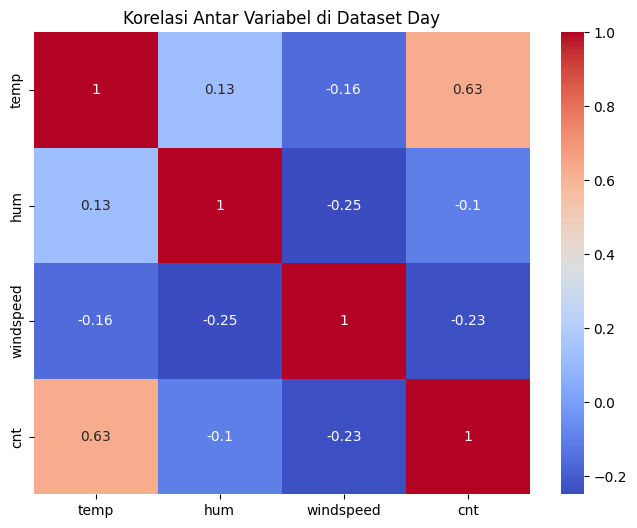

In [19]:
correlation_matrix = day_df[['temp', 'hum', 'windspeed', 'cnt']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel di Dataset Day')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana pengaruh cuaca (suhu, kelembaban, kecepatan angin) terhadap jumlah sepeda yang disewa?

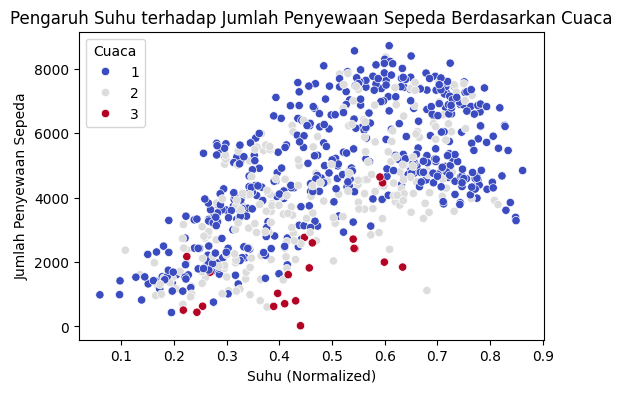

<ipython-input-20-d0faed9c9215>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a len

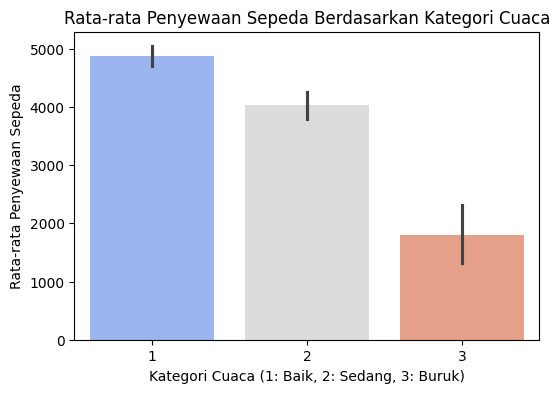

In [20]:
# Load dataset day.csv
df = pd.read_csv('/content/data/day.csv')

# Scatter plot untuk melihat pengaruh suhu terhadap jumlah penyewaan sepeda
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='temp', y='cnt', hue='weathersit', palette='coolwarm')
plt.title('Pengaruh Suhu terhadap Jumlah Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Cuaca')
plt.show()

# Bar plot untuk rata-rata penyewaan sepeda berdasarkan kategori cuaca
plt.figure(figsize=(6,4))
sns.barplot(x='weathersit', y='cnt', data=df, palette='coolwarm')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kategori Cuaca')
plt.xlabel('Kategori Cuaca (1: Baik, 2: Sedang, 3: Buruk)')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()


### Pertanyaan 2: Apakah jumlah penyewaan sepeda berbeda pada hari kerja dan akhir pekan/hari libur?


<ipython-input-21-7aa5d25ec57c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


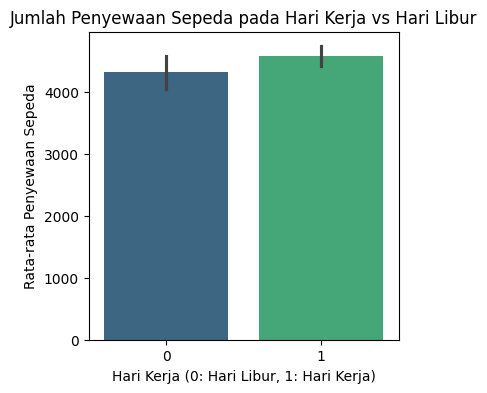

<ipython-input-21-7aa5d25ec57c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workingday', y='cnt', data=df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in 

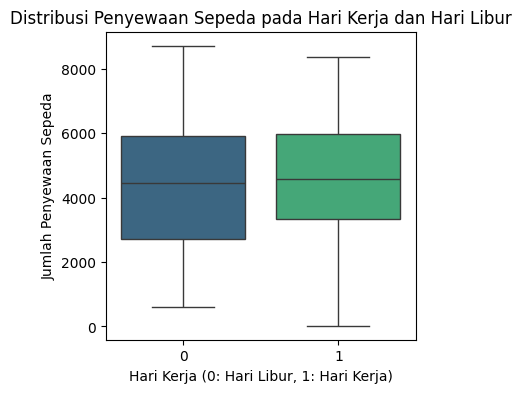

In [21]:
# Bar plot untuk rata-rata penyewaan sepeda pada hari kerja dan hari libur
plt.figure(figsize=(4,4))
sns.barplot(x='workingday', y='cnt', data=df, palette='viridis')
plt.title('Jumlah Penyewaan Sepeda pada Hari Kerja vs Hari Libur')
plt.xlabel('Hari Kerja (0: Hari Libur, 1: Hari Kerja)')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()

# Box plot untuk distribusi penyewaan sepeda pada hari kerja dan hari libur
plt.figure(figsize=(4,4))
sns.boxplot(x='workingday', y='cnt', data=df, palette='viridis')
plt.title('Distribusi Penyewaan Sepeda pada Hari Kerja dan Hari Libur')
plt.xlabel('Hari Kerja (0: Hari Libur, 1: Hari Kerja)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()


### Pertanyaan 3: Apakah terdapat pola musiman yang jelas dalam penyewaan sepeda (musim panas, dingin, musim gugur, dan musim semi)?

<ipython-input-22-a81a555b6f29>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='season_name', y='cnt', data=df, ci=None, marker='o', sort=False)


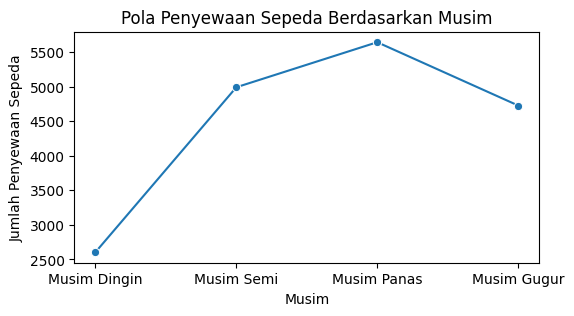

<ipython-input-22-a81a555b6f29>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='cnt', data=df, palette='magma')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a lengt

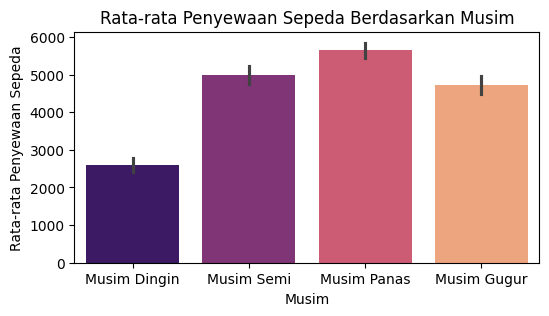

In [22]:
# Line plot untuk melihat pola penyewaan sepeda berdasarkan musim
season_map = {1: 'Musim Dingin', 2: 'Musim Semi', 3: 'Musim Panas', 4: 'Musim Gugur'}
df['season_name'] = df['season'].map(season_map)

plt.figure(figsize=(6,3))
sns.lineplot(x='season_name', y='cnt', data=df, ci=None, marker='o', sort=False)
plt.title('Pola Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Bar plot rata-rata penyewaan sepeda per musim
plt.figure(figsize=(6,3))
sns.barplot(x='season_name', y='cnt', data=df, palette='magma')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()

**Insight:**
1. Pengaruh Cuaca:
Cuaca yang lebih baik (weathersit = 1) berhubungan dengan penyewaan sepeda yang lebih tinggi (rata-rata 4876.79) dibandingkan dengan cuaca buruk (weathersit = 2: 4035.86, weathersit = 3: 1803.29).

2. Hari Kerja vs Akhir Pekan:
Rata-rata penyewaan pada hari kerja (4584.82) sedikit lebih tinggi dibandingkan hari non-kerja (4330.17),

3. Pola Musiman:
Musim panas (season 3) memiliki penyewaan tertinggi (rata-rata 5644.30), sementara musim dingin (season 1) terendah (2604.13).

## Analisis Lanjutan (RFM Analysis)

1. Recency (R): jarak waktu sejak hari terakhir penyewaan sepeda hingga hari ini.
2. Frequency (F): seberapa sering sepeda disewa selama periode tertentu.
3. Monetary (M): jumlah total penyewaan sepeda (dihitung dari cnt total sepeda yang disewa).

Menghitung Recency

In [23]:
df['dteday'] = pd.to_datetime(df['dteday'])

# Menghitung hari terakhir penyewaan
today_date = df['dteday'].max()

# Menghitung recency sebagai jumlah hari sejak transaksi terakhir hingga hari ini
df['Recency'] = (today_date - df['dteday']).dt.days
print(df[['dteday', 'Recency']].head())



      dteday  Recency
0 2011-01-01      730
1 2011-01-02      729
2 2011-01-03      728
3 2011-01-04      727
4 2011-01-05      726


Menghitung Frequency

In [24]:
frequency_df = df.groupby('season').agg({'cnt': 'count'}).reset_index()
frequency_df.columns = ['season', 'Frequency']

print(frequency_df)

   season  Frequency
0       1        181
1       2        184
2       3        188
3       4        178


Menghitung Monetary

In [25]:
# Menghitung monetary dengan menjumlahkan total penyewaan sepeda per musim
monetary_df = df.groupby('season').agg({'cnt': 'sum'}).reset_index()
monetary_df.columns = ['season', 'Monetary']

print(monetary_df)


   season  Monetary
0       1    471348
1       2    918589
2       3   1061129
3       4    841613


Menggabungkan RFM

In [26]:
rfm = pd.merge(df.groupby('season').agg({'Recency': 'mean'}).reset_index(), frequency_df, on='season')
rfm = pd.merge(rfm, monetary_df, on='season')
print(rfm)

   season     Recency  Frequency  Monetary
0       1  468.314917        181    471348
1       2  422.500000        184    918589
2       3  329.500000        188   1061129
3       4  238.000000        178    841613


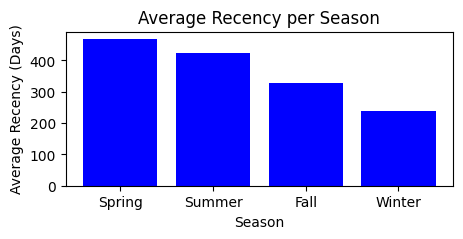

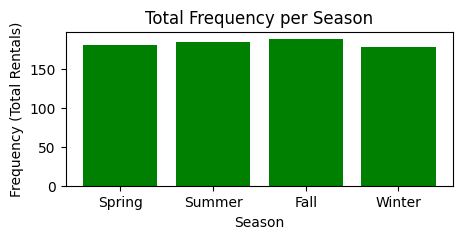

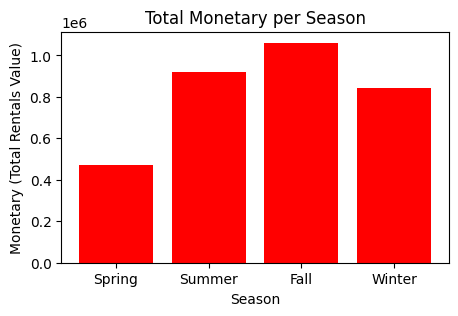

In [36]:
# Membuat diagram batang untuk Recency
plt.figure(figsize=(5, 2))
plt.bar(rfm['season'], rfm['Recency'], color='blue')
plt.title('Average Recency per Season')
plt.xlabel('Season')
plt.ylabel('Average Recency (Days)')
plt.xticks(rfm['season'], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

# Membuat diagram batang untuk Frequency
plt.figure(figsize=(5, 2))
plt.bar(rfm['season'], rfm['Frequency'], color='green')
plt.title('Total Frequency per Season')
plt.xlabel('Season')
plt.ylabel('Frequency (Total Rentals)')
plt.xticks(rfm['season'], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

# Membuat diagram batang untuk Monetary
plt.figure(figsize=(5, 3))
plt.bar(rfm['season'], rfm['Monetary'], color='red')
plt.title('Total Monetary per Season')
plt.xlabel('Season')
plt.ylabel('Monetary (Total Rentals Value)')
plt.xticks(rfm['season'], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()


## Conclusion

- Conclution pertanyaan 1 : Cuaca (khususnya suhu) berpengaruh signifikan terhadap jumlah penyewaan sepeda, dengan cuaca yang lebih baik (weathersit = 1) cenderung meningkatkan penyewaan.

- Conclution pertanyaan 2 : Jumlah penyewaan sepeda sedikit lebih tinggi pada hari kerja dibandingkan hari libur.

- Conclution pertanyaan 3 : Terdapat pola musiman yang jelas, di mana penyewaan sepeda cenderung lebih tinggi pada musim panas dan lebih rendah pada musim dingin.